In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# MLG CC2 - THE BURMAN TRAVELING SALESMAN PROBLEM (TSP)
 


In [2]:
from pyevolve import G1DList
from pyevolve import GAllele
from pyevolve import DBAdapters
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Mutators
from pyevolve import Statistics
from pyevolve import Crossovers
from pyevolve import Consts

In [3]:
import numpy as np

#### Provided latitude longitude

In [4]:
# Coordinates given in the assignement
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
       17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
       96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

# Let's group them together
COORDINATES = list(zip(LAT, LON))

In [5]:
from geopy.distance import geodesic

def geodesic_distance(cityA, cityB):
    """
    return the geodesic distance between A and B in km.
    """
    return geodesic(cityA, cityB).km

In [6]:
def distance_matrix(coords):
    """
    Inspiration: http://www.psychicorigami.com/2007/04/17/tackling-the-travelling-salesman-problem-part-one/
    return the distance matrix
    """
    dim=len(coords)
    dist_mat= np.empty(shape=(dim, dim), dtype=float)
    for i, coordA in enumerate(coords):
        for j,coordB in enumerate(coords):
            dist= geodesic_distance(coordA, coordB)
            dist_mat[i, j] = dist
    
    return dist_mat     

In [7]:
DISTANCE_MATRIX = distance_matrix(COORDINATES)

In [8]:
def tour_length(matrix, tour):
    """
    """
    l = len(tour)
    total=0.0
    
    for i in range(l):
        cityA = tour[i]
        cityB = tour[(i + 1) % l]
        
        total += matrix[cityA, cityB]
    
    return total

In [9]:
def fitness(chromosome):
    distance = tour_length(DISTANCE_MATRIX, chromosome)
    return distance

In [10]:
import sys, random


def Initializator(genome, **args):
    """
    G1DList TSP Initializator
    """
    genome.clearList()
    lst = [i for i in range(genome.getListSize())]
    random.shuffle(lst)
    genome.setInternalList(lst)

In [11]:
import matplotlib.pyplot as plt 


def display_plot(path):
    
    path.append(path[0]) # So we have a complete tour
    res = list(zip(*map(lambda p: COORDINATES[p], path)))
    plt.plot(res[0],res[1], '-o')
    plt.show()

In [22]:
def do_ga(generations, crossover_rate, mutation_rate, population_size, freq_stats):
    """
    Inspiration: http://pyevolve.sourceforge.net/examples.html#example-12-the-travelling-salesman-problem-tsp
    """
    length = len(COORDINATES)
    
    setOfAlleles = GAllele.GAlleles(homogeneous=True)
    lst = [ i for i in range(length) ]
    a = GAllele.GAlleleList(lst)
    setOfAlleles.add(a)
    
    genome = G1DList.G1DList(length)
    genome.setParams(allele=setOfAlleles)
    
    genome.evaluator.set(fitness)
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(Initializator)
    
    ga = GSimpleGA.GSimpleGA(genome)
    
    # Record evolution results in a database
    sqlite_adapter = DBAdapters.DBSQLite(identify="log_tsp", resetDB=True)
    ga.setDBAdapter(sqlite_adapter)
    
    ga.setGenerations(generations)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(crossover_rate)
    ga.setMutationRate(mutation_rate)
    ga.setPopulationSize(population_size)
    
    ga.setElitism(True)

    ga.evolve(freq_stats=freq_stats)
        
    # Take the best and display
    best = ga.bestIndividual()
    sol = best.genomeList

    print(best)
    return sol


In [23]:
# Hyper parameters
GENERATIONS = 200
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.03 
POPULATION_SIZE = 100
FREQ_STATS = 100

solution = do_ga(GENERATIONS, CROSSOVER_RATE, MUTATION_RATE, POPULATION_SIZE, FREQ_STATS)



Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [7971.14(8497.57)/5283.36(4744.76)/6642.62(6642.62)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw)             [4603.64(6383.67)/3739.84(3515.90)/3836.37(3836.37)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw)             [4361.64(5781.95)/3537.22(3346.76)/3634.70(3634.70)]
Total time elapsed: 1.567 seconds.
- GenomeBase
	Score:			 3346.761974
	Fitness:		 3537.219663

	Params:		 {'allele': - GAlleles
	Homogeneous:	 True
	List size:	 1
	Alleles:

Allele for position 0:
- GAlleleList
	List size:	 14
	Allele Options:	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

}

	Slot [Evaluator] (Count: 1)
		Name: fitness - Weight: 0.50
	Slot [Initializator] (Count: 1)
		Name: Initializator - Weight: 0.50
		Doc: 
    G1DList TSP Initializator
    
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator

    .. note:: this mutator is :term:`Data Type Independent`

    
	Slot [Crossover] (Count

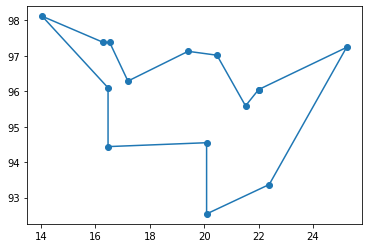

In [24]:
display_plot(solution)

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
200 generations found !


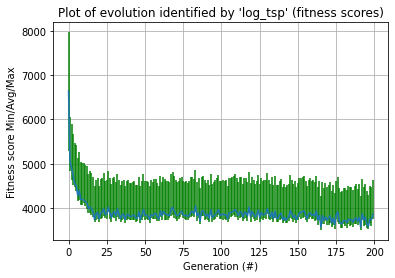

In [25]:
# anaconda3 or miniconda3
# change env name
# Generate a graph showing the evolutionary results: fitness vs generations
%run ~/anaconda3/envs/mlg/bin/pyevolve_graph.py -i log_tsp -2

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
200 generations found !


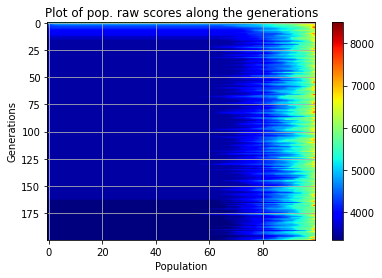

In [26]:
# Generate a heatmap of population fitness score distribution over generations
%run ~/anaconda3/envs/mlg/bin/pyevolve_graph.py -i log_tsp -8